# Linear Regression over Multivariate data

lets work this time with boston dataset in sklearn.datasets

- in single feature datasets we got a linear function hx=theta0 + theta1*x
- in two-variate datasets we got a plane hx=theta0 + theta1*x1 + theta2*x2
- in more than two variable datasets we got a hyperplane 

In [92]:
from sklearn.datasets import load_boston

In [93]:
boston = load_boston()

In [94]:
X = boston.data
Y = boston.target

In [95]:
print(X.shape) # see number of features are 13 
print(Y.shape)

(506, 13)
(506,)


## 1. Using sklearn to do the calculation of theta values for us

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
# 1. splitting data in training and test part
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [98]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [99]:
# 1. creating an object of model 
alg = LinearRegression(normalize=True)

In [100]:
# 2. training model on training data
alg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [101]:
# 3. predicting the output
Y_pred = alg.predict(X_test)

In [102]:
%matplotlib inline

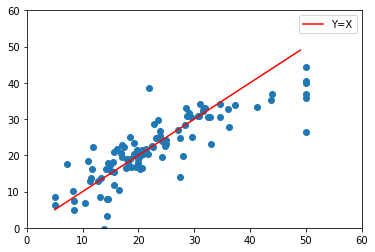

In [103]:
# 4. comparing Y_pred with Y_test using plotting to see how good our model is: graphically
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(Y_test,Y_pred)
ranger = np.arange(5,50)
plt.plot(ranger,ranger,'r',label = 'Y=X')
plt.axis([0,60,0,60])
plt.legend()
plt.show()

### Accuracy of our Model

#### Coefficeient of Determination (`R square`)
```python
R^2 = 1-u/v 
where 
u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and 
v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
```

#### Interpretation of R^2

```python
- Basically we are predicitng how bad or good our algorithm with respect to (if we predict all values over x_test to be mean value)

- 1.) if our algo predict as bad as means values , u == v is True hence R^2 being Zero score
- 2.) if our algo predict values closer to actual values,  u < v is True hence R^2 being more toward score One-> so better score is good score
- 3.) if our algo predict values far from actual values and worse than mean values,  u > v is True hence R^2 being more toward score Zero 
```     

#### Result 
    higher the score(Coefficient of Determination) better is our algo.

In [104]:
# it internally find the predicted values for X_test using alg model that we fitted and than compare
# it with Y_test that we passed as second argument
test_score = alg.score(X_test,Y_test)
train_score = alg.score(X_train,Y_train) # how well our model remember the data we use to fit the model

In [105]:
test_score, train_score

(0.7034623076515882, 0.7513747062933072)

##### coeffiecients and intercepts

In [106]:
print(len(alg.coef_)) # since there are 13 features there will be 14 parameters value form theta0 to theta13
alg.coef_  # thirteen are here

13


array([-9.89913563e-02,  4.25047578e-02,  1.67390094e-02,  3.06437882e+00,
       -1.56462528e+01,  4.01888422e+00, -8.31558474e-04, -1.44628034e+00,
        2.67827281e-01, -1.04725485e-02, -8.88651815e-01,  8.25262805e-03,
       -5.49367192e-01])

In [107]:
alg.intercept_ # 1 is here

32.906130908637024

## 2. Writting above algo from scratch for multivariate data using Gradient descent

In [108]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [109]:

# theta will be np.array([theta0,theta1,.............,thetaN])
def error(X,Y,theta):
    hx = hypothesis(X,theta)    
    return (0.5) * np.sum((hx-Y)**2)
    
def hypothesis(X,theta):    
    # returning h(Xi) for each sample (Xi) hence returning an array of size X.shape[0]
    data = np.sum(X*theta[1:], axis=1) + theta[0]
    return data

    
def gradient(X,Y,theta):    
    grad = np.zeros(X.shape[1]+1) # n-featured data have (n+1) parameters.
    hx = hypothesis(X,theta)    
    grad[0] = np.sum((hx-Y))
    
    for i in range(1,len(grad)) :
        # d(cost) / d(theta[i]) = sum((hx-y)*x[i])
        grad[i] = np.sum( (hx-Y) * X[:,i-1])
    return grad
    
    
def gradientDescent_multivariate(X,Y,learning_rate=0.0001):

    theta = np.zeros(X.shape[1]+1)
    error_list = []    
    err = error(X,Y,theta)
    error_list.append(err)
    
    while True:
        grad = gradient(X,Y,theta)
        theta = theta - learning_rate * grad     
        err = error(X,Y,theta)
        error_change = abs(err - error_list[-1]) 
        error_list.append(err)        
        if error_change < 0.00001:
            break
        
    return theta,error_list


In [110]:
# using sklearn to do the scaling data
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X = sd.fit_transform(X)


# or can be done using X = (X-X.mean(axis=0)) / X.std(axis=0)

In [111]:
# 1. splitting data in training and test part
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101) # splitting exactly same as we did above

In [112]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [113]:
tht,error_list = gradientDescent_multivariate(X_train,Y_train)

In [114]:
# intercept
tht

array([22.33658176, -0.85004138,  0.98937129,  0.1119804 ,  0.77801762,
       -1.81071759,  2.82152356, -0.02390664, -3.0425964 ,  2.32256481,
       -1.75532792, -1.92170291,  0.75262121, -3.9187913 ])

In [115]:
Y_pred = hypothesis(X_test,tht)

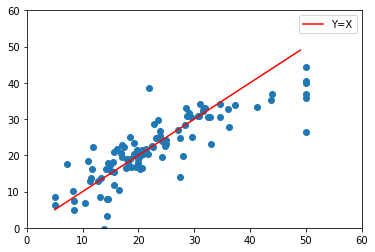

In [116]:
plt.scatter(Y_test,Y_pred)
ranger = np.arange(5,50)
plt.plot(ranger,ranger,'r',label = 'Y=X')
plt.axis([0,60,0,60])
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import r2_score

In [118]:
test_score = r2_score(Y_test,Y_pred)

In [119]:
Y_train_pred = hypothesis(X_train,tht)

In [120]:
train_score = r2_score(Y_train,Y_train_pred)

In [121]:
test_score,train_score # same as we got from sklearn

(0.7034337844873662, 0.7513745935685816)

## Note -> how score is calculated using sklearn.metric

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
u = mean_squared_error(Y_train,Y_train_pred)

In [124]:
u

19.19822645644905

In [125]:
Y_train_mean_arr = np.full(Y_train.shape, Y_train.mean())

In [126]:
v = mean_squared_error(Y_train,Y_train_mean_arr)

In [127]:
v

77.21747641162631

In [128]:
score = 1 - u/v

In [129]:
score

0.7513745935685816

# Thank You!